# Search algorithms

## Creating a graph

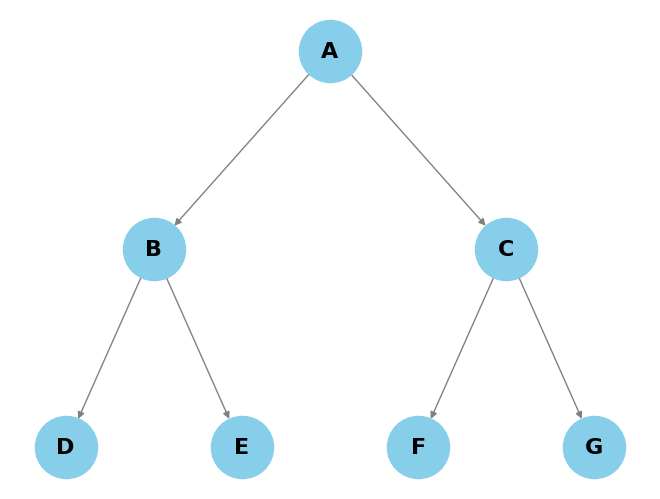

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import Any

# Define the adjacency list
adj_list = {'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F', 'G'], 'D': [], 'E': [], 'F': [], 'G': []}

# Create the graph
G = nx.DiGraph(adj_list)

# Define the position of each node manually
pos = {
    'A': (0, 3),
    'B': (-1, 2),
    'C': (1, 2),
    'D': (-1.5, 1),
    'E': (-0.5, 1),
    'F': (0.5, 1),
    'G': (1.5, 1),
}

# Draw the graph
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_color='black', font_weight='bold', edge_color='gray')
plt.show()

In [18]:
def backtrack(visited_from: dict[Any, Any], v_start: Any, v_target: Any) -> list[Any]:
    v_current = v_target
    path = [v_target]
    while v_current != v_start:
        v_current = visited_from[v_current]
        path.append(v_current)
    return path

## Breadth first search

In [19]:
def breadth_fist_search(G: dict[Any, Any], v_start: Any, v_target: Any, traversal_order: bool=False) -> list[Any]:
    if traversal_order:
        traversal = [] 
    
    # Declare all vertices as unvisited. 
    visited = {v: False for v in G}
    visited[v_start] = True
    visited_from = dict()

    queue = [v_start]
    v_current = None
    while len(queue) > 0:
        v_current = queue.pop(0)
        for v in G[v_current]:
            if visited[v] is False:
                queue.append(v)
                visited[v] = True
                visited_from[v] = v_current
        if traversal_order: 
            traversal.append(v_current) 
    if traversal_order:
        print(traversal)
    return list(reversed(backtrack(visited_from, v_start, v_target)))

In [20]:
path = breadth_fist_search(adj_list, 'A', 'G')
print(f"Path from A to G: {path}  with cost {len(path)}")

Path from A to G: ['A', 'C', 'G']  with cost 3


In [21]:
path = breadth_fist_search(adj_list, 'A', 'G', traversal_order=True)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


## Depth first search

In [22]:
def depth_fist_search(G: dict[Any, Any], v_start: Any, v_target: Any, traversal_order: bool=False) -> list[Any]:
    if traversal_order:
        traversal = [] 
    
    # Declare all vertices as unvisited. 
    visited = {v: False for v in G}
    visited[v_start] = True
    visited_from = dict()

    queue = [v_start]
    v_current = None
    while len(queue) > 0:
        v_current = queue.pop(-1)
        for v in reversed(G[v_current]):
            if visited[v] is False:
                queue.append(v)
                visited[v] = True
                visited_from[v] = v_current
        if traversal_order: 
            traversal.append(v_current) 
    if traversal_order:
        print(traversal)
    return list(reversed(backtrack(visited_from, v_start, v_target)))

In [23]:
path = depth_fist_search(adj_list, 'A', 'G')
print(f"Path from A to G: {path}  with cost {len(path)}")

Path from A to G: ['A', 'C', 'G']  with cost 3


In [24]:
path = depth_fist_search(adj_list, 'A', 'G', traversal_order=True)

['A', 'B', 'D', 'E', 'C', 'F', 'G']
